# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [140]:
import pandas

## HIỂU DỮ LIỆU

1. Đọc dữ liệu

In [141]:
grades = pandas.read_csv("data/tips.csv")
grades.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


2. Xóa cột Unnamed: 0

In [142]:
grades = grades.drop("Unnamed: 0", axis=1)
grades.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.

In [143]:
grades.shape

(244, 7)

4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng

- Thuộc tính phân loại: Sex, Smoker, Day, Time

- Thuộc tính định lương: total_bill, tip, size

5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?

In [144]:
print("Số lượng nam/nữ:\n" + str(grades["sex"].value_counts()))
print("\nTỉ lệ nam/nữ\n" + str(grades["sex"].value_counts(normalize=True) * 100))

Số lượng nam/nữ:
sex
Male      157
Female     87
Name: count, dtype: int64

Tỉ lệ nam/nữ
sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?

In [145]:
hut_thuoc = grades["smoker"].value_counts()
print("Số lượng người hút thuốc:\n"+ str(hut_thuoc["Yes"]))

hut_thuoc_phan_tram = grades["smoker"].value_counts(normalize=True) * 100
print("Tỉ lệ người hút thuốc:\n" + str(hut_thuoc_phan_tram["Yes"]))

Số lượng người hút thuốc:
93
Tỉ lệ người hút thuốc:
38.114754098360656


7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?

In [146]:
ngay = grades["day"].value_counts()
print("Ngày nhiều khách nhất: ", str(ngay.idxmax()))
print("Số lượng: " + str(ngay.max()))

Ngày nhiều khách nhất:  Sat
Số lượng: 87


8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?

In [147]:
time = grades["time"].value_counts()
print("Thời gian nhieuề khách nhất: ", str(time.idxmax()))
print("Số lượng: " + str(time.max()))

Thời gian nhieuề khách nhất:  Dinner
Số lượng: 176


9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?

In [ ]:
print("Nhóm khách dùng bữa tại nhà hàng nhiều nhất là:\n" + str(grades["size"].value_counts().max()))

NameError: name 'grades' is not defined

10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [149]:
print("Trung bình trong một bữa ăn nhà hàng phục vụ:")
grades["time"].count()
grades["size"].sum()
avgPerMeal = grades["size"].sum() / grades["time"].count()
print(avgPerMeal)

Trung bình trong một bữa ăn nhà hàng phục vụ:
2.569672131147541


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?

In [150]:
totalTips = (grades["tip"] != 0).count()
totalBills = grades.shape[0]

rateEarnTipped = totalBills / totalTips * 100
print(rateEarnTipped)

100.0


2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?

In [151]:
avgTipPerBill = grades["tip"] / grades["total_bill"]
avg_tip_ratio = avgTipPerBill.mean()
print(avg_tip_ratio * 100)

16.080258172250474


3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?

In [152]:
max_tip_by_gender = grades.groupby("sex")["tip"].sum()
print("Giá trị lớn nhất người năm: " + str(max_tip_by_gender.idxmax()))
tip_frequency = grades.groupby("sex")["tip"].count()
print("\nNgười đc tip thường xuyên nhất:" + tip_frequency.idxmax())

Giá trị lớn nhất người năm: Male

Người đc tip thường xuyên nhất:Male


4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?

In [153]:
max_tip_by_smoker = grades.groupby("smoker")["tip"].sum()
print("Giá trị lớn nhất là người: " + str(max_tip_by_gender.idxmax()))
tip_by_smoker_frequency = grades.groupby("smoker")["tip"].count()
print("\nNgười tip thường xuyên nhất: " + tip_by_smoker_frequency.idxmax())

Giá trị lớn nhất là người: Male

Người tip thường xuyên nhất: No


5. Thống kê tổng số tiền tip nhận được theo ngày.

In [154]:
grades.groupby("time")["tip"].sum()

time
Dinner    546.07
Lunch     185.51
Name: tip, dtype: float64

# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

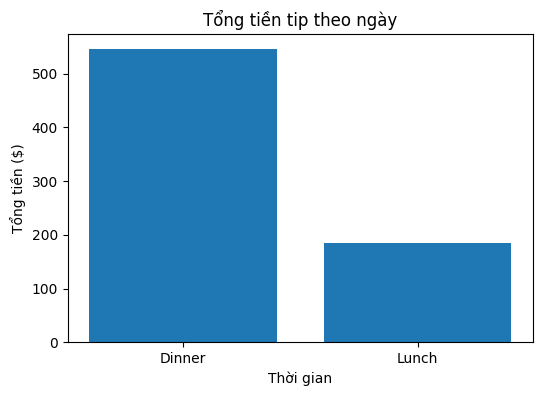

In [156]:
tip_by_time = grades.groupby("time")["tip"].sum()


plt.figure(figsize=(6, 4))
plt.bar(tip_by_time.index, tip_by_time.values)

plt.xlabel("Thời gian")
plt.ylabel("Tổng tiền ($)")
plt.title("Tổng tiền tip theo ngày")
plt.show()

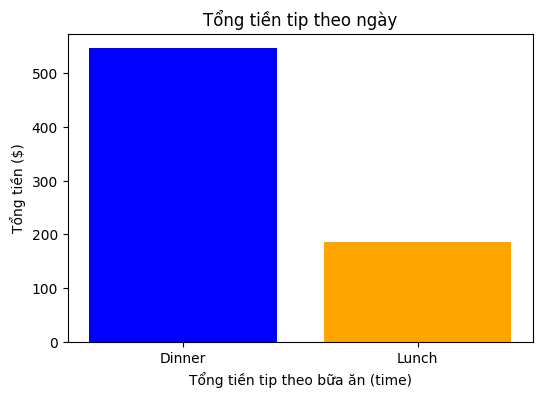

In [157]:
tip_by_time = grades.groupby("time")["tip"].sum()

plt.figure(figsize=(6, 4))
plt.bar(tip_by_time.index, tip_by_time.values, color=['blue', 'orange'])

plt.xlabel("Tổng tiền tip theo bữa ăn (time)")
plt.ylabel("Tổng tiền ($)")
plt.title("Tổng tiền tip theo ngày")
plt.show()

array([[<Axes: title={'center': 'total_bill'}>]], dtype=object)

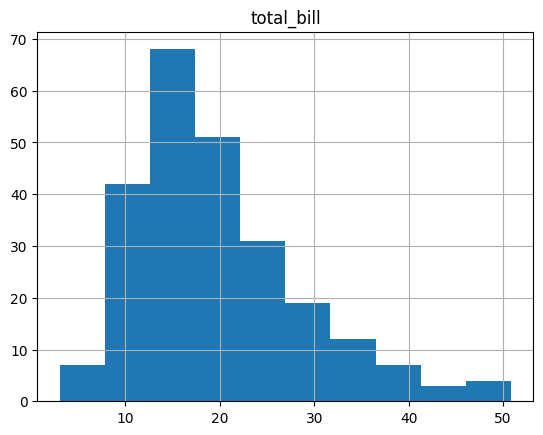

In [158]:
grades.hist("total_bill")

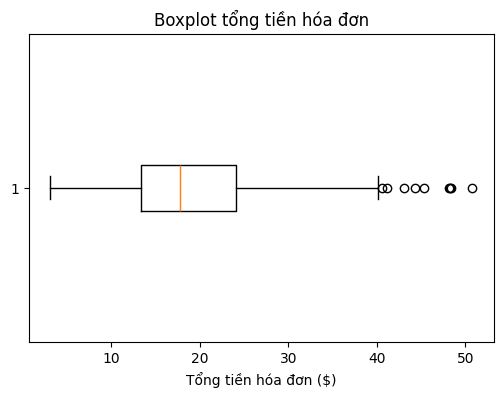

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(grades["total_bill"], vert=False)

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.title("Boxplot tổng tiền hóa đ")
plt.show()

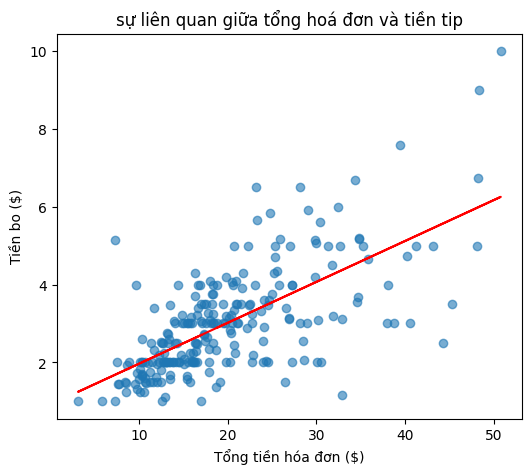

In [160]:
x = grades["total_bill"]
y = grades["tip"]

m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6, 5))
plt.scatter(x, y, alpha=0.6, label="Data points")
plt.plot(x, m*x + b, color="red", label="Regression Line")

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.ylabel("Tiền bo ($)")
plt.title("sự liên quan giữa tổng hoá đơn và tiền tip")
plt.show()

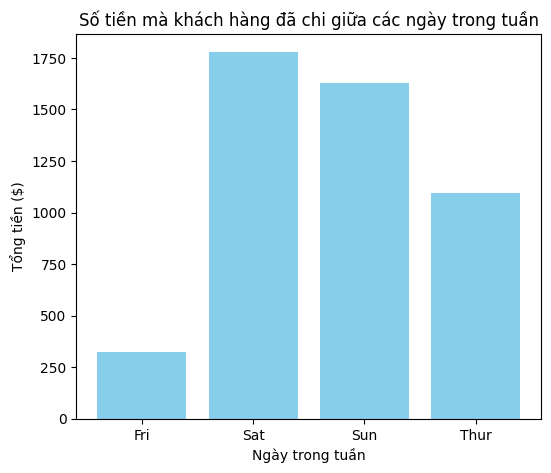

In [168]:
total_spent_by_day = grades.groupby("day")["total_bill"].sum()

plt.figure(figsize=(6, 5))
plt.bar(total_spent_by_day.index, total_spent_by_day.values, color="skyblue")

plt.xlabel("Ngày trong tuần")
plt.ylabel("Tổng tiền ($)")
plt.title("Số tiền mà khách hàng đã chi giữa các ngày trong tuần")
plt.show()


## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

C:\Users\Admin\AppData\Local\Temp\ipykernel_1876\349964811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="time", y="tip", data=tip_by_time, palette="Blues")


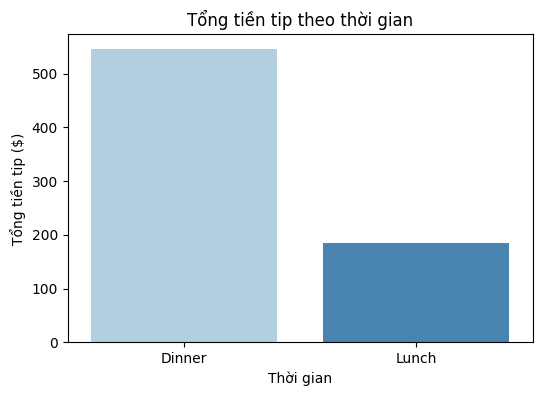

In [162]:
tip_by_time = grades.groupby("time")["tip"].sum().reset_index()  # Chuyển về DataFrame

plt.figure(figsize=(6, 4))
sns.barplot(x="time", y="tip", data=tip_by_time, palette="Blues")

plt.xlabel("Thời gian")
plt.ylabel("Tổng tiền tip ($)")
plt.title("Tổng tiền tip theo thời gian")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1876\3619113863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="time", y="tip", data=tip_by_time_df, palette=["blue", "orange"])


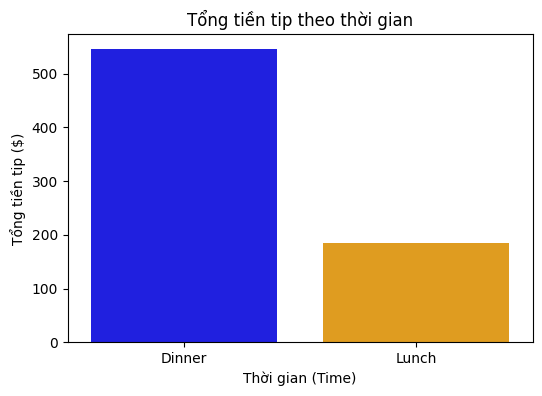

In [163]:
tip_by_time_df = tip_by_time.reset_index()  

plt.figure(figsize=(6, 4))
sns.barplot(x="time", y="tip", data=tip_by_time_df, palette=["blue", "orange"])

plt.xlabel("Thời gian (Time)")
plt.ylabel("Tổng tiền tip ($)")
plt.title("Tổng tiền tip theo thời gian")
plt.show()

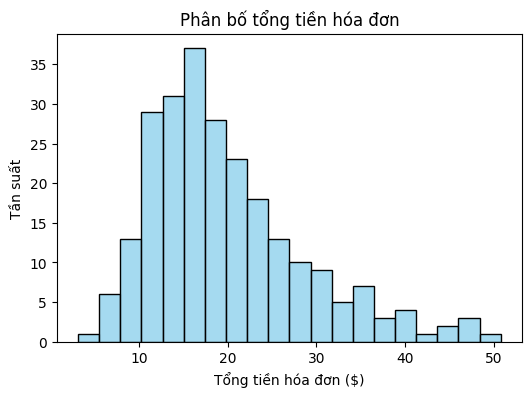

In [166]:
plt.figure(figsize=(6, 4))
sns.histplot(grades["total_bill"], bins=20, kde=False, color="skyblue")

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.ylabel("Tần suất")
plt.title("Phân bố tổng tiền hóa đơn")
plt.show()

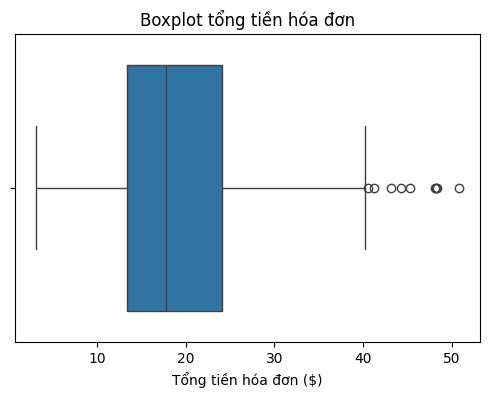

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=grades["total_bill"]) 

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.title("Boxplot tổng tiền hóa đơn")
plt.show()

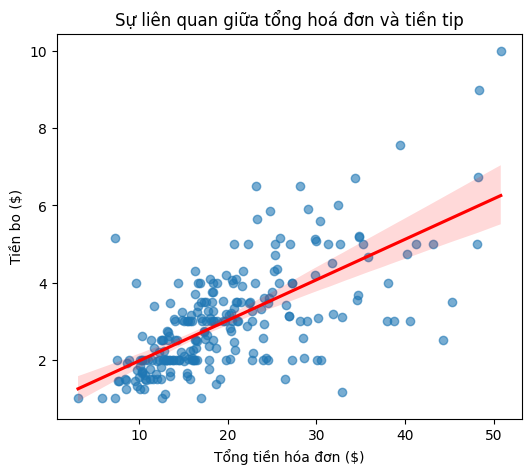

In [167]:
plt.figure(figsize=(6, 5))
sns.regplot(x=grades["total_bill"], y=grades["tip"], scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})

plt.xlabel("Tổng tiền hóa đơn ($)")
plt.ylabel("Tiền bo ($)")
plt.title("Sự liên quan giữa tổng hoá đơn và tiền tip")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1876\1120565022.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day", y="total_bill", data=total_spent_by_day, palette="Blues")


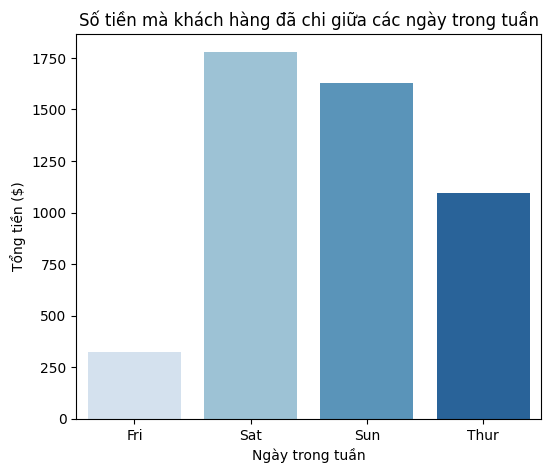

In [169]:
total_spent_by_day = grades.groupby("day")["total_bill"].sum().reset_index()  

plt.figure(figsize=(6, 5))
sns.barplot(x="day", y="total_bill", data=total_spent_by_day, palette="Blues")

plt.xlabel("Ngày trong tuần")
plt.ylabel("Tổng tiền ($)")
plt.title("Số tiền mà khách hàng đã chi giữa các ngày trong tuần")
plt.show()